In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

sns.set(color_codes=True)

import urllib.request
import json

# Plotting the Composition of Data



## Static Composition

### Pie Chart

In [340]:
p = sns.load_dataset('penguins')

In [341]:
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [342]:
s = p.groupby('species')['species'].count()

In [343]:
s

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

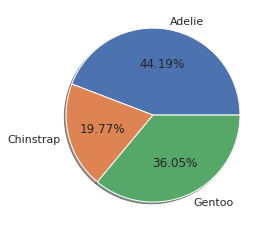

In [344]:
plt.pie(s, labels = s.index, autopct = "%.2f%%", shadow = True)
plt.show()

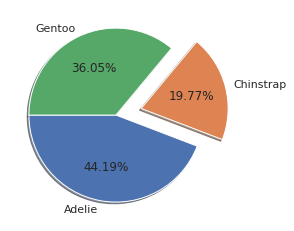

In [345]:
plt.pie(s, labels = s.index, autopct = "%.2f%%", shadow = True
        , explode = [0, 0.3, 0], startangle = 180)
plt.show()

### Donut Chart

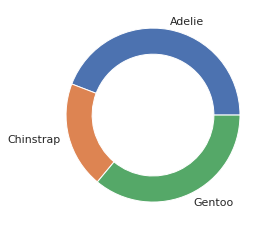

In [346]:
plt.pie(s, labels = s.index, wedgeprops=dict(width = 0.3));
plt.show()

In [347]:
cmap = plt.get_cmap('tab10')
my_colors = cmap(np.array([0, 1, 2]))

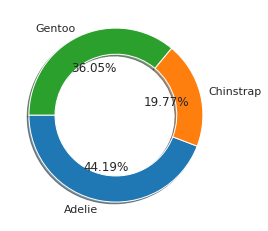

In [348]:
plt.pie(s, labels = s.index, wedgeprops=dict(width = 0.3),
        colors = my_colors, autopct = "%.2f%%", shadow = True,
        startangle = 180);
plt.show()

In [349]:
i = p.groupby('island')['island'].count()
cmap = plt.get_cmap('Dark2')
my_colors = cmap(np.array([0, 1, 2]))

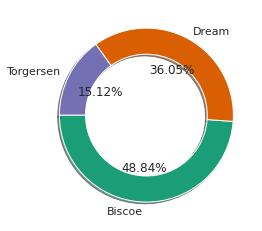

In [350]:
plt.pie(i, labels = i.index, wedgeprops=dict(width = 0.3),
        colors = my_colors, autopct = "%.2f%%", shadow = True,
        startangle = 180);
plt.show()

In [351]:
cT = pd.crosstab(p.island, p.species)

In [352]:
cT

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


In [353]:
i = cT.sum(axis = 1)

In [354]:
i

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

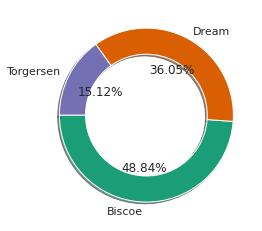

In [355]:
plt.pie(i, labels = i.index, wedgeprops=dict(width = 0.3),
        colors = my_colors, autopct = "%.2f%%", shadow = True,
        startangle = 180);
plt.show()

In [356]:
s = cT.values.flatten()

In [357]:
s

array([ 44,   0, 124,  56,  68,   0,  52,   0,   0])

In [358]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

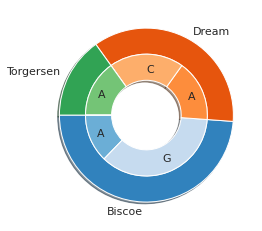

In [359]:
plt.pie(i, labels = i.index, wedgeprops=dict(width = 0.3),
        colors = outer_colors, shadow = True,
        startangle = 180, radius = 1);
plt.pie(s, wedgeprops=dict(width = 0.3),
        colors = inner_colors, shadow = True,
        startangle = 180, radius = 0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''], labeldistance = 0.75);
plt.show()

### Bar Plot

In [360]:
url = "https://api.covid19india.org/states_daily.json"
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [361]:
df.tail(3)

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
387,5,4944,68,1680,1109,14,133,21-Jul-20,0,1349,28,174,1026,33,604,418,608,3649,720,3,0,8336,21,90,785,0,9,647,379,87,983,25,Confirmed,1430,4965,254,39172,0,2128,207,2261
388,8,1346,18,938,1206,0,170,21-Jul-20,0,1200,10,88,744,10,726,107,181,1664,274,3,0,7188,18,64,573,0,1,400,271,53,549,16,Recovered,2062,4894,81,27589,0,1024,85,1617
389,0,62,0,6,11,0,1,21-Jul-20,0,27,0,3,34,1,9,8,9,61,1,0,0,246,0,0,18,0,0,8,1,1,9,0,Deceased,7,75,1,671,0,37,0,35


In [362]:
dfT = df.tail(3)
dfT.drop('date', axis = 1, inplace = True)
dfT.set_index('status', inplace = True)
dfT = dfT.T

dfT = dfT.apply(pd.to_numeric)
dfT.drop('tt', inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [363]:
dfT.head()

status,Confirmed,Recovered,Deceased
an,5,8,0
ap,4944,1346,62
ar,68,18,0
as,1680,938,6
br,1109,1206,11


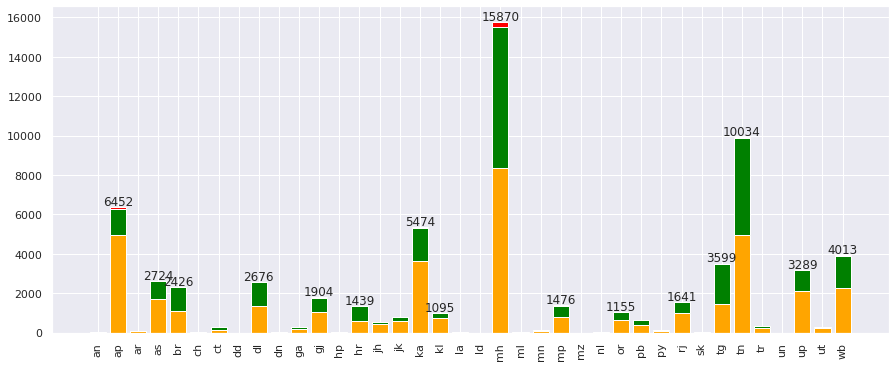

In [364]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(dfT.index, dfT.Confirmed, color = 'Orange');
plt.bar(dfT.index, dfT.Recovered, bottom = dfT.Confirmed, color = 'Green');
plt.bar(dfT.index, dfT.Deceased, bottom = dfT.Confirmed + dfT.Recovered, color = 'Red');
plt.xticks(rotation = 90)

for i, val in enumerate(dfT.index):
    y = dfT.loc[val].sum() + 100
    x = i
    if y > 1000:
        plt.text(x, y, str(y), ha = 'center')
plt.show()

### Relative Stacked Bar Plots

In [365]:
dfT['Total'] = 0
dfT['Total'] = dfT.sum(axis = 1)

In [366]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, an to wb
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  38 non-null     int64
 1   Recovered  38 non-null     int64
 2   Deceased   38 non-null     int64
 3   Total      38 non-null     int64
dtypes: int64(4)
memory usage: 2.7+ KB


In [367]:
dfT['CFraction'] = dfT['Confirmed']/dfT['Total']
dfT['RFraction'] = dfT['Recovered']/dfT['Total']
dfT['DFraction'] = dfT['Deceased']/dfT['Total']

In [368]:
dfT.head()
dfT.drop('an', inplace = True)

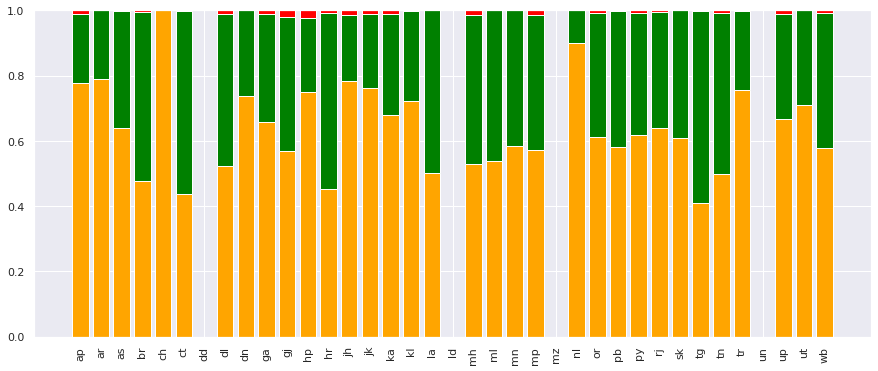

In [369]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(dfT.index, dfT.CFraction, color = 'Orange');
plt.bar(dfT.index, dfT.RFraction, bottom = dfT.CFraction, color = 'Green');
plt.bar(dfT.index, dfT.DFraction, bottom = dfT.CFraction + dfT.RFraction, color = 'Red');
plt.xticks(rotation = 90)
plt.show()

In [370]:
dfT = dfT.sort_values('CFraction', ascending = False)

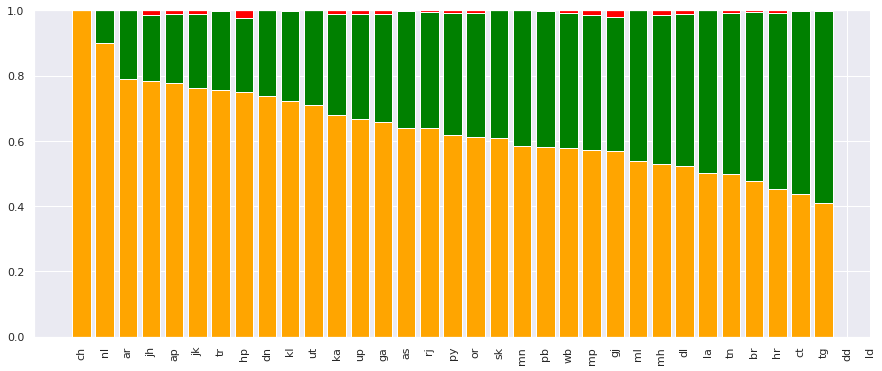

In [371]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(dfT.index, dfT.CFraction, color = 'Orange');
plt.bar(dfT.index, dfT.RFraction, bottom = dfT.CFraction, color = 'Green');
plt.bar(dfT.index, dfT.DFraction, bottom = dfT.CFraction + dfT.RFraction, color = 'Red');
plt.xticks(rotation = 90)
plt.show()

In [372]:
dfT = dfT.sort_values('Confirmed', ascending = False)

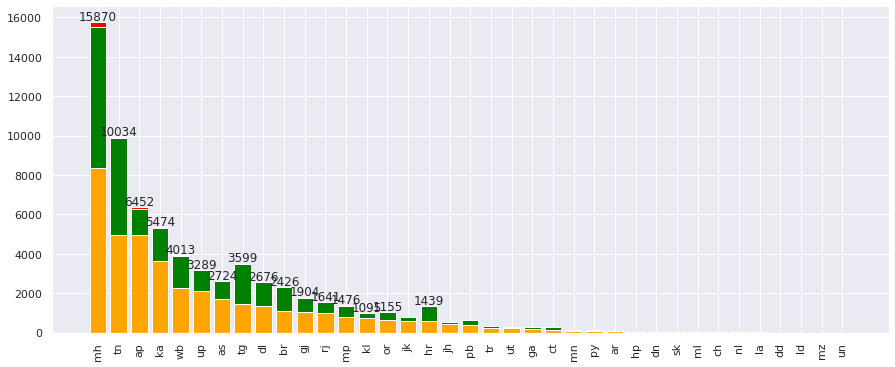

In [373]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(dfT.index, dfT.Confirmed, color = 'Orange');
plt.bar(dfT.index, dfT.Recovered, bottom = dfT.Confirmed, color = 'Green');
plt.bar(dfT.index, dfT.Deceased, bottom = dfT.Confirmed + dfT.Recovered, color = 'Red');
plt.xticks(rotation = 90)

for i, val in enumerate(dfT.index):
    y = (int)(dfT.loc[val, 'Total']) + 100
    x = i
    if y > 1000:
        plt.text(x, y, str(y), ha = 'center')
plt.show()

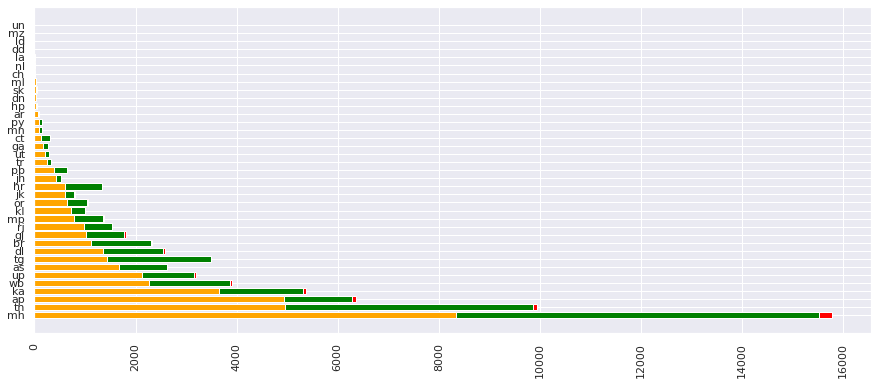

In [374]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.barh(dfT.index, dfT.Confirmed, color = 'Orange');
plt.barh(dfT.index, dfT.Recovered, left = dfT.Confirmed, color = 'Green');
plt.barh(dfT.index, dfT.Deceased, left = dfT.Confirmed + dfT.Recovered, color = 'Red');
plt.xticks(rotation = 90)
plt.show()

## Time-varying Composition of Data

## Stacked Area Plots

In [375]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [376]:
df_ = df[['mh', 'date', 'status']]

In [377]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [378]:
df_.head()

,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


In [379]:
df_ = df_.pivot_table(values = 'mh', columns = 'status', index = 'date')

In [380]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


In [381]:
cmap = plt.get_cmap('tab10')
my_colors = cmap(np.array([1, 3, 2]))

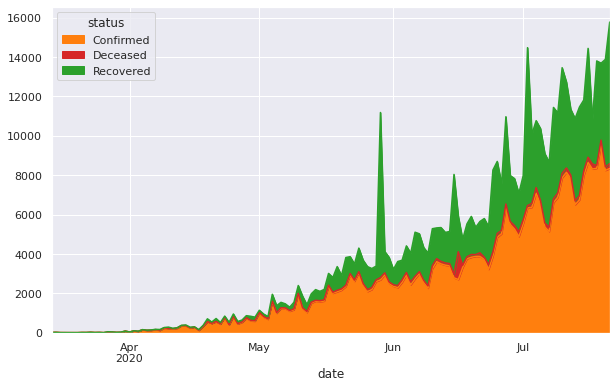

In [382]:
df_.plot.area(figsize = (10, 6), color = my_colors);

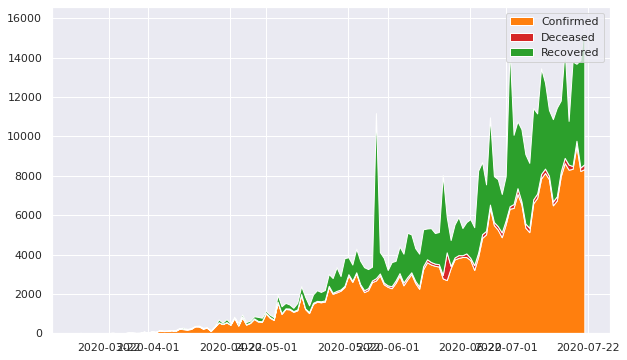

In [383]:

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.stackplot(df_.index, df_.Confirmed, df_.Deceased, df_.Recovered, 
              colors = my_colors, 
              labels = ['Confirmed', 'Deceased', 'Recovered']);
plt.legend();

In [384]:
def plot_stacked_area(state):
    df_ = df[[state , 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values = state, columns = 'status', index = 'date')
    fig = plt.gcf()
    fig.set_size_inches(15, 6)
    plt.stackplot(df_.index, df_.Confirmed, df_.Deceased, df_.Recovered, 
              colors = my_colors, 
              labels = ['Confirmed', 'Deceased', 'Recovered']);
    plt.legend();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


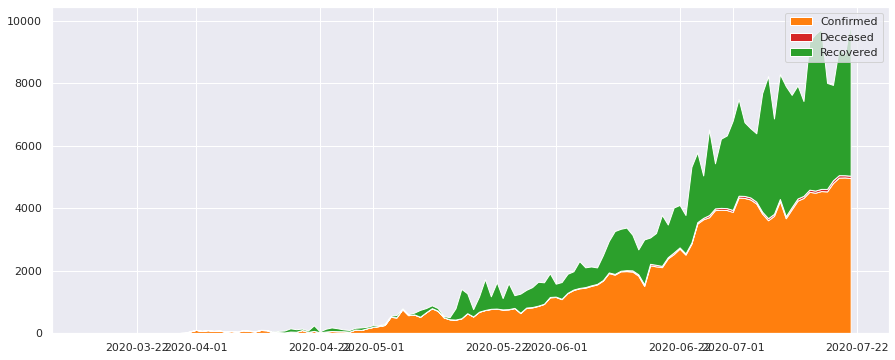

In [385]:
plot_stacked_area('tn');

In [386]:
def plot_stacked_area_relative(state):
    df_ = df[[state , 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values = state, columns = 'status', index = 'date')
    fig = plt.gcf()
    fig.set_size_inches(15, 6)
    plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis = 1), 
                  df_.Deceased/df_.sum(axis = 1), 
                  df_.Recovered/df_.sum(axis = 1), 
              colors = my_colors, 
              labels = ['Confirmed', 'Deceased', 'Recovered']);
    plt.legend();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


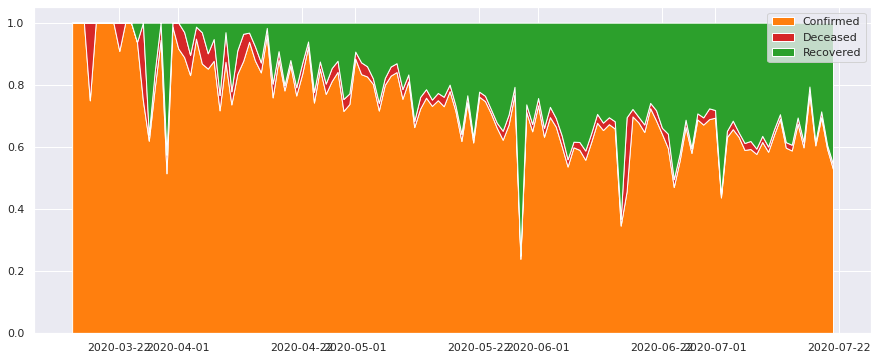

In [387]:
plot_stacked_area_relative('mh')

# Plotting Relationship between Data

## Scatter Plot

In [388]:
t = sns.load_dataset('tips')

In [389]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


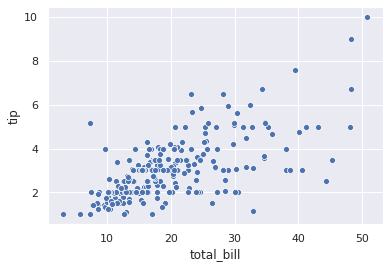

In [390]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = t);

In [391]:
t['tip_fraction'] = t['total_bill']/t['tip']

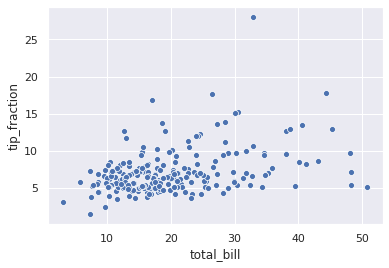

In [392]:
sns.scatterplot(x = 'total_bill', y = 'tip_fraction', data = t);

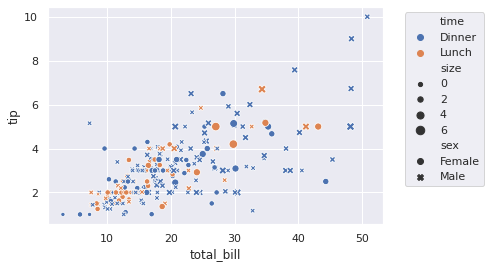

In [393]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = t, 
                hue = 'time', style = 'sex', size = 'size');
plt.legend(bbox_to_anchor = (1.05, 1))

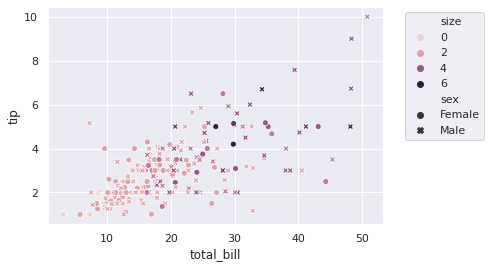

In [394]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = t, 
                hue = 'size', style = 'sex');
plt.legend(bbox_to_anchor = (1.05, 1))

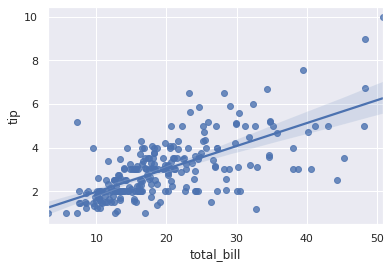

In [395]:
sns.regplot(x = 'total_bill', y = 'tip', data = t);

In [396]:
d = sns.load_dataset('diamonds')

In [397]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


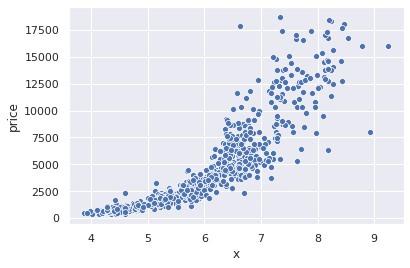

In [398]:
sns.scatterplot(x = 'x', y = 'price', data = d.sample(1000));

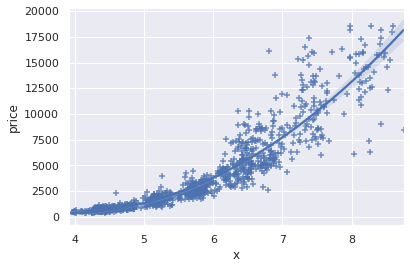

In [399]:
sns.regplot(x = 'x', y = 'price', data = d.sample(1000),
            marker = '+', order = 2);

## Bar Plots

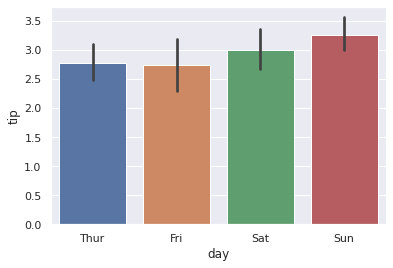

In [400]:
sns.barplot(x = 'day', y = 'tip', data = t);

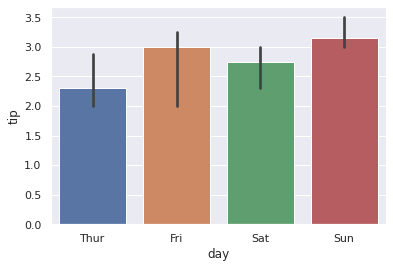

In [401]:
sns.barplot(x = 'day', y = 'tip', data = t, estimator = np.median);

In [402]:
def my_estimator(v):
    return np.quantile(v, 0.25)

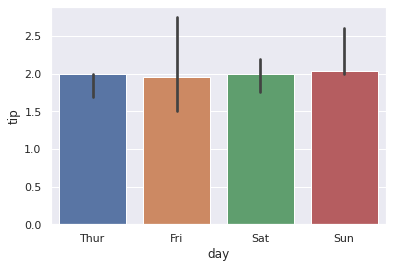

In [403]:
sns.barplot(x = 'day', y = 'tip', data = t, estimator = my_estimator);

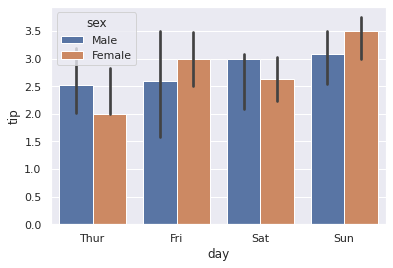

In [404]:
sns.barplot(x = 'day', y = 'tip', hue = 'sex' ,data = t, estimator = np.median);

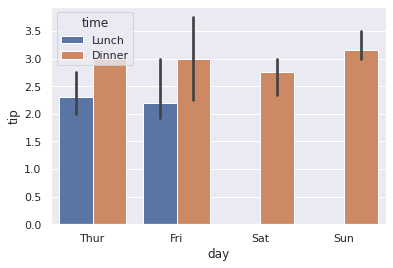

In [405]:
sns.barplot(x = 'day', y = 'tip', hue = 'time' ,data = t, estimator = np.median);

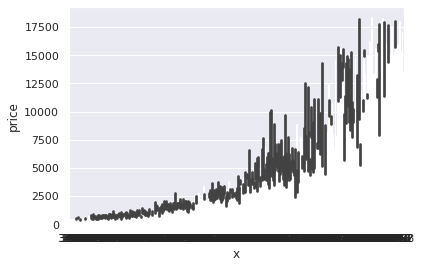

In [406]:
sns.barplot(x = 'x', y = 'price', data = d.sample(1000));

In [407]:
d['x_q'] = pd.cut(d['x'], bins = 7)

In [408]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.069, 4.603]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.069, 4.603]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.069, 4.603]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.069, 4.603]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(3.069, 4.603]"


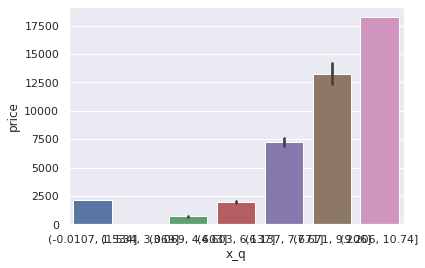

In [409]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000));

In [410]:
d['x_q'] = pd.cut(d['x'], bins = 20)

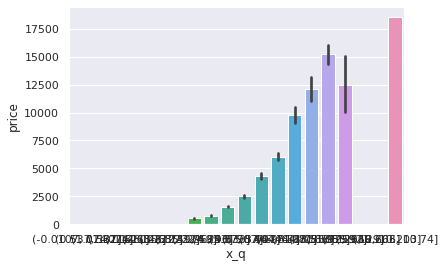

In [411]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000));

In [412]:
d['x_q'] = pd.cut(d['x'], bins = 20, labels = False)

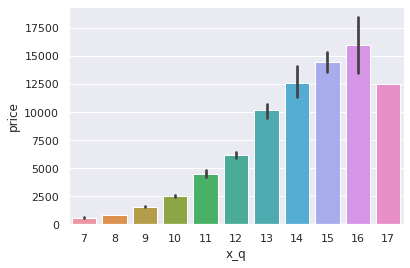

In [413]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000));

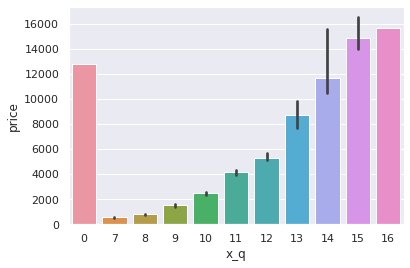

In [414]:
sns.barplot(x = 'x_q', y = 'price', data = d.sample(1000), estimator = np.median);

## Line Plot

In [415]:
f = sns.load_dataset('fmri')

In [416]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


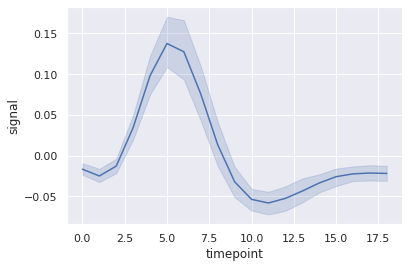

In [417]:
sns.lineplot(x = 'timepoint', y = 'signal', data = f);

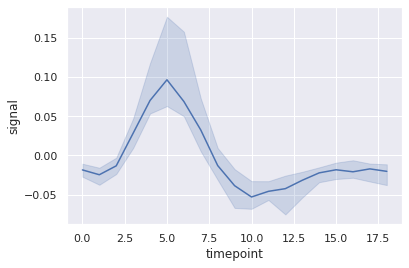

In [418]:
sns.lineplot(x = 'timepoint', y = 'signal', data = f, estimator = np.median);

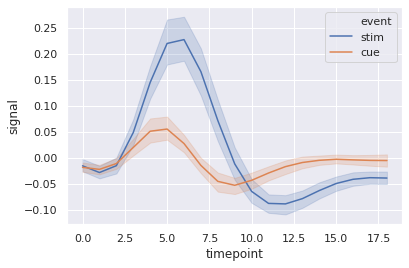

In [419]:
sns.lineplot(x = 'timepoint', y = 'signal', 
             data = f, hue = 'event');

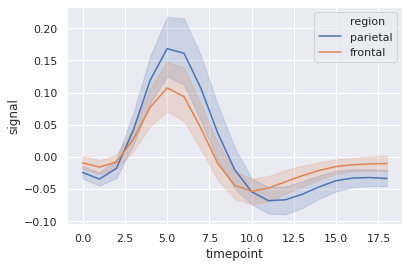

In [420]:
sns.lineplot(x = 'timepoint', y = 'signal', 
             data = f, hue = 'region');

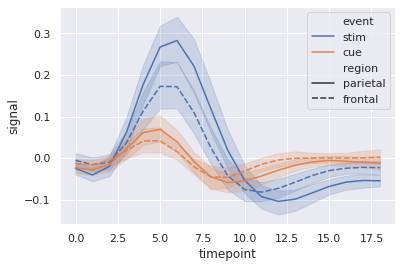

In [421]:
sns.lineplot(x = 'timepoint', y = 'signal', 
             data = f, hue = 'event', style = 'region');

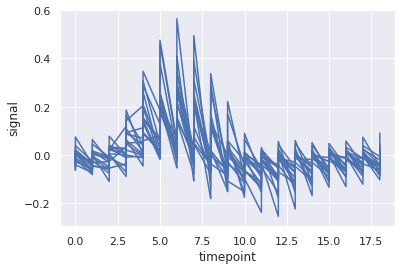

In [422]:
sns.lineplot(x = 'timepoint', y = 'signal', units = 'subject', data = f, estimator = None);

In [423]:
f_ = f[(f.region == 'parietal') & (f.event == 'stim')]

In [424]:
f_.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


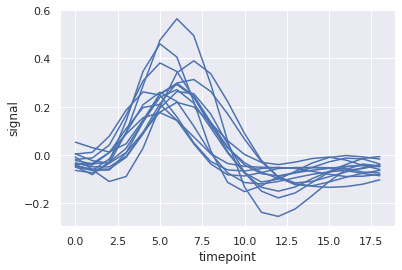

In [425]:
sns.lineplot(x = 'timepoint', y = 'signal', units = 'subject', data = f_, estimator = None);

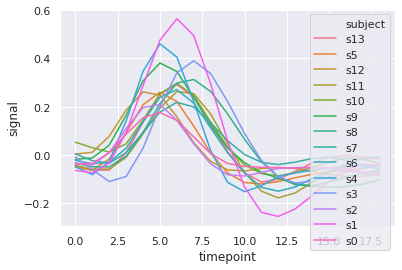

In [426]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'subject', data = f_, estimator = None);

In [427]:
url = "https://api.covid19india.org/states_daily.json"
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('tt', axis = 1, inplace = True)
df.set_index('date', inplace = True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis = 1, inplace = True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace = True)

In [428]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,0,12,0,0
1,2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0
2,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1
4,2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,0,2,1,0


In [429]:
df_ = pd.melt(df, id_vars = "date", 
              value_vars = list(df.columns).remove("date"),
              var_name = "state", value_name = "confirmed")

In [430]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


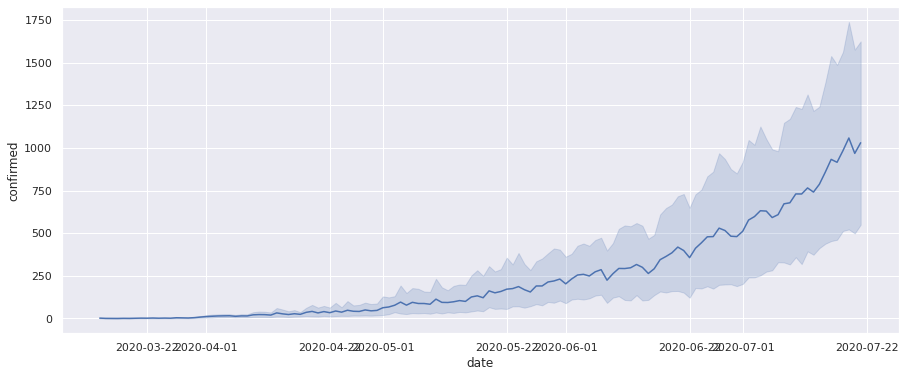

In [431]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', data = df_);

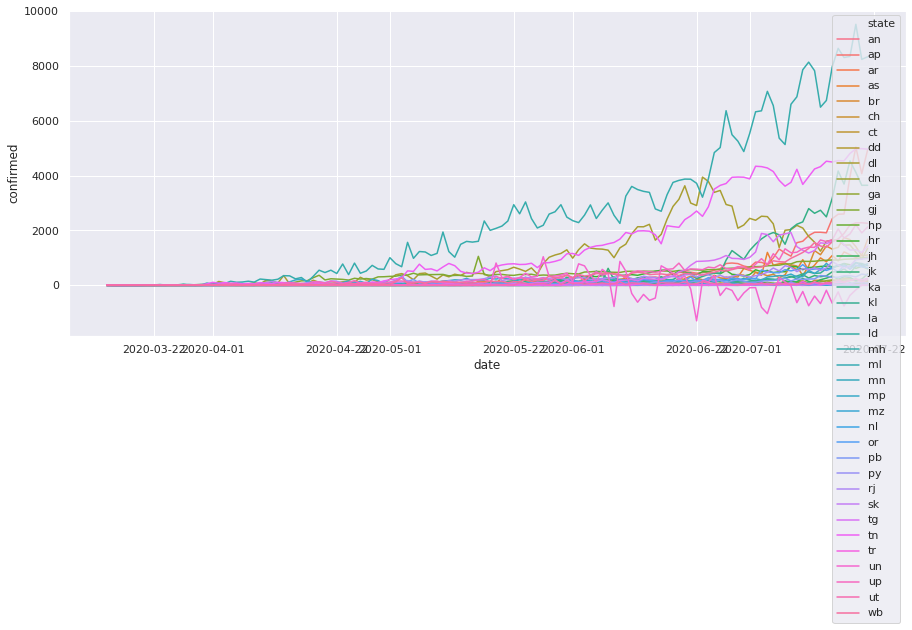

In [432]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue = 'state' ,data = df_);

In [433]:
states = ['mh', 'tn', 'wb', 'dl', 'gj', 'up']
df_ = df_[df_['state'].isin(states)]

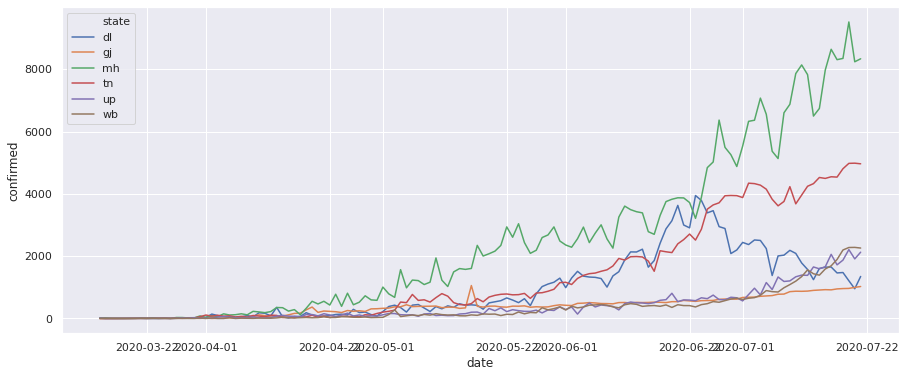

In [434]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue = 'state' ,data = df_);

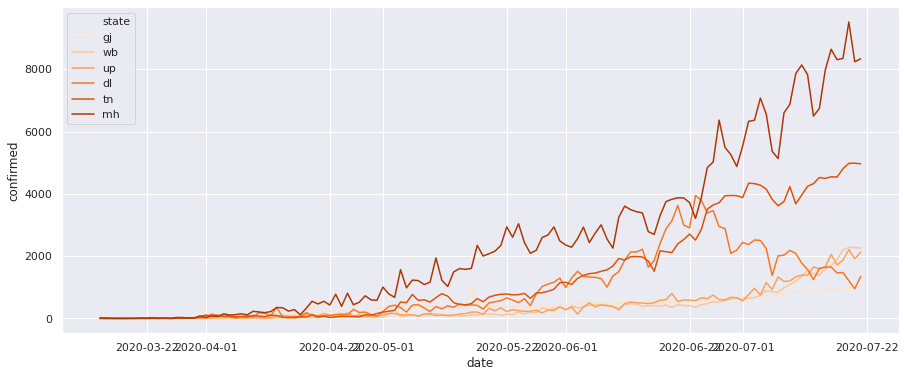

In [436]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue = 'state' ,data = df_,
             palette = 'Oranges', hue_order = ['gj','wb','up','dl','tn','mh']);

## HeatMaps

In [437]:
x = np.random.rand(10 ,10)

In [438]:
x

array([[0.34769756, 0.9363398 , 0.29635098, 0.92243178, 0.06285088,
        0.87016699, 0.34268058, 0.6234186 , 0.67803157, 0.73459614],
       [0.76118319, 0.51342376, 0.00408415, 0.9922396 , 0.11523287,
        0.93614586, 0.68679234, 0.83988773, 0.3312774 , 0.31757184],
       [0.84878037, 0.39407185, 0.8114561 , 0.77473854, 0.40183852,
        0.72995498, 0.95219574, 0.45184157, 0.15615365, 0.77826834],
       [0.23258364, 0.42453962, 0.15425199, 0.3578739 , 0.68080385,
        0.26654182, 0.75396192, 0.40924671, 0.51319449, 0.96500851],
       [0.64254841, 0.43100988, 0.55528623, 0.03557155, 0.51207798,
        0.50276383, 0.02418427, 0.17089828, 0.51994049, 0.55500082],
       [0.50352232, 0.96099328, 0.12555572, 0.99232549, 0.10212972,
        0.81378092, 0.7448387 , 0.56066373, 0.82522743, 0.92134598],
       [0.75932593, 0.8049458 , 0.7561508 , 0.45000969, 0.22998871,
        0.08204114, 0.53229918, 0.87500673, 0.77005921, 0.28626314],
       [0.77710469, 0.64432781, 0.5129178

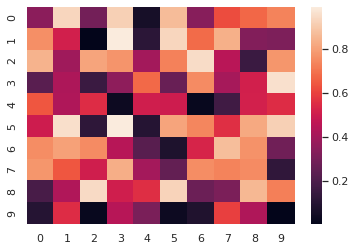

In [439]:
sns.heatmap(x);

In [440]:
fl = sns.load_dataset('flights')

In [441]:
fl.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [442]:
fl_ = pd.pivot(fl, index = 'year', columns = 'month', values = 'passengers')

In [443]:
fl_.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


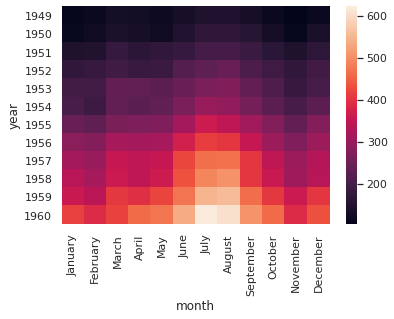

In [444]:
sns.heatmap(fl_);

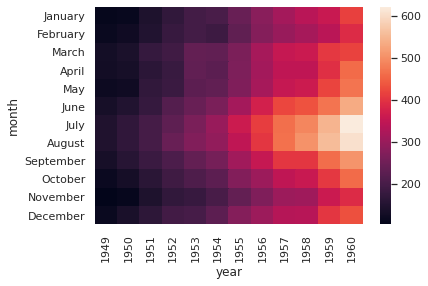

In [445]:
sns.heatmap(fl_.T);

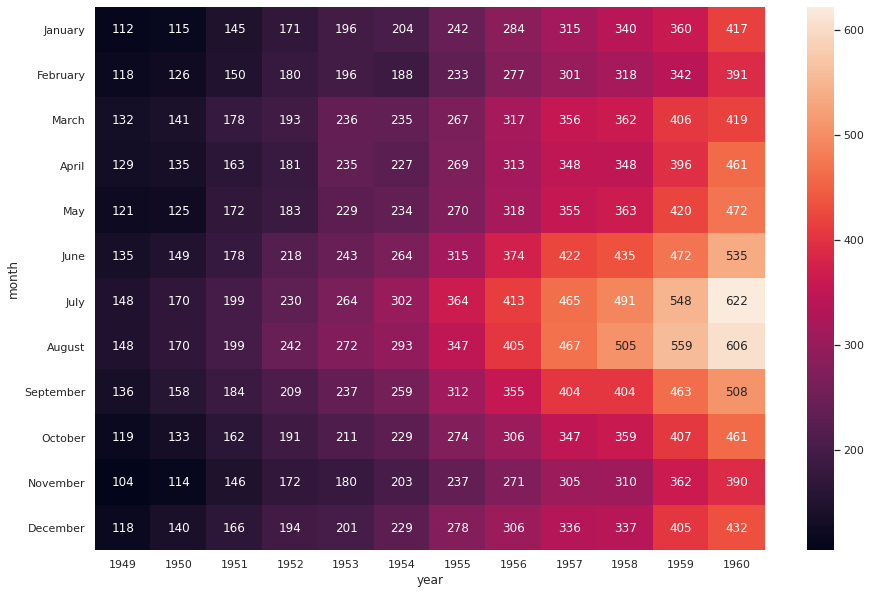

In [447]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d");

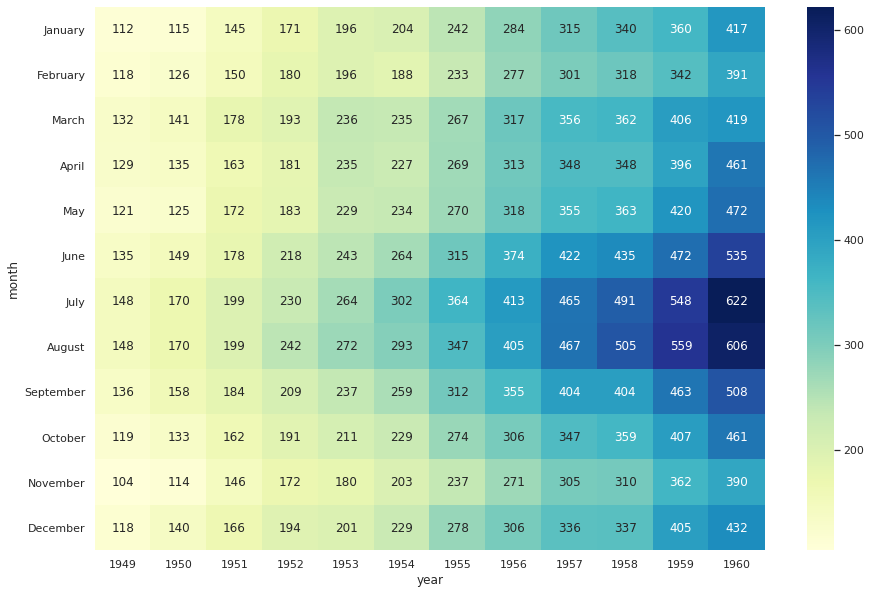

In [448]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", cmap = "YlGnBu");

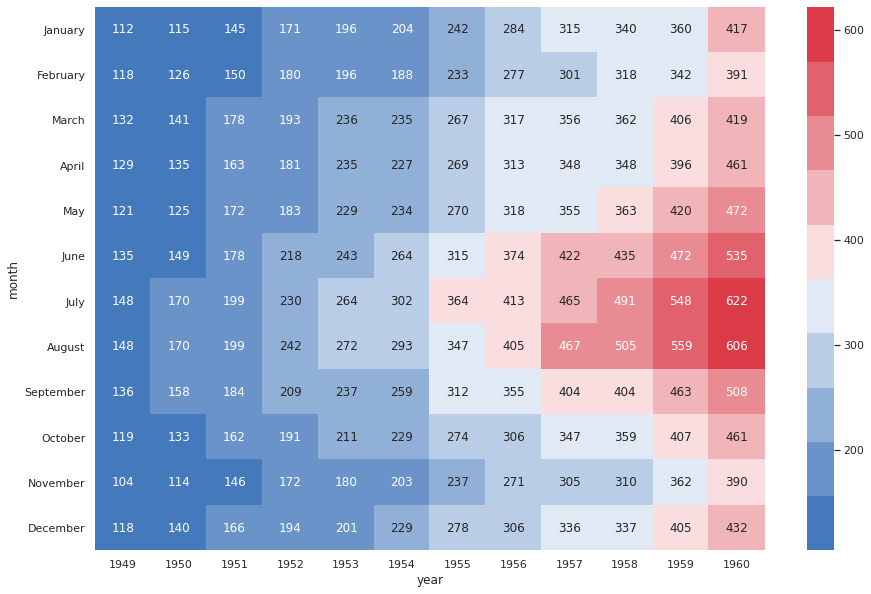

In [453]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", 
            cmap = sns.diverging_palette(250, 10, n = 10));

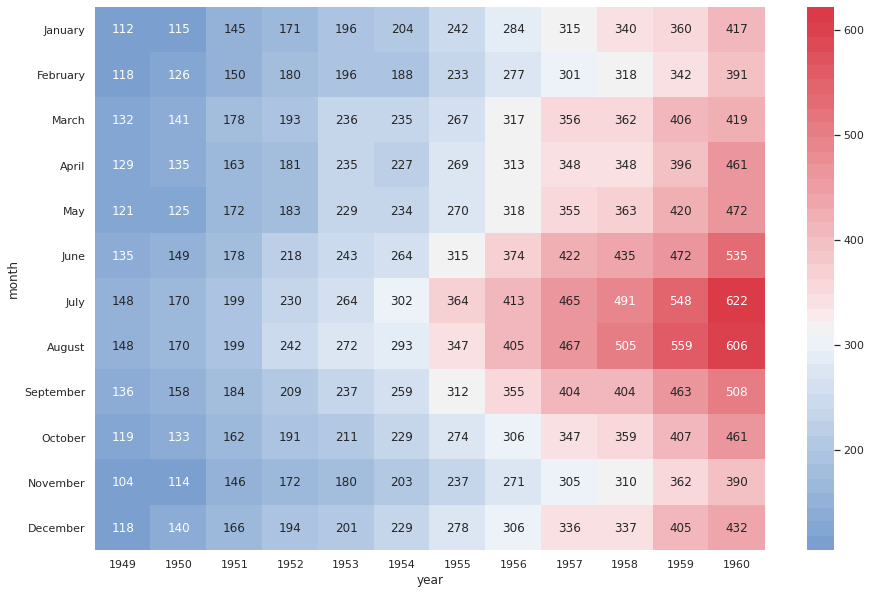

In [455]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", 
            cmap = sns.diverging_palette(250, 10, n = 45),
            center = fl_.loc[1955, 'June']);

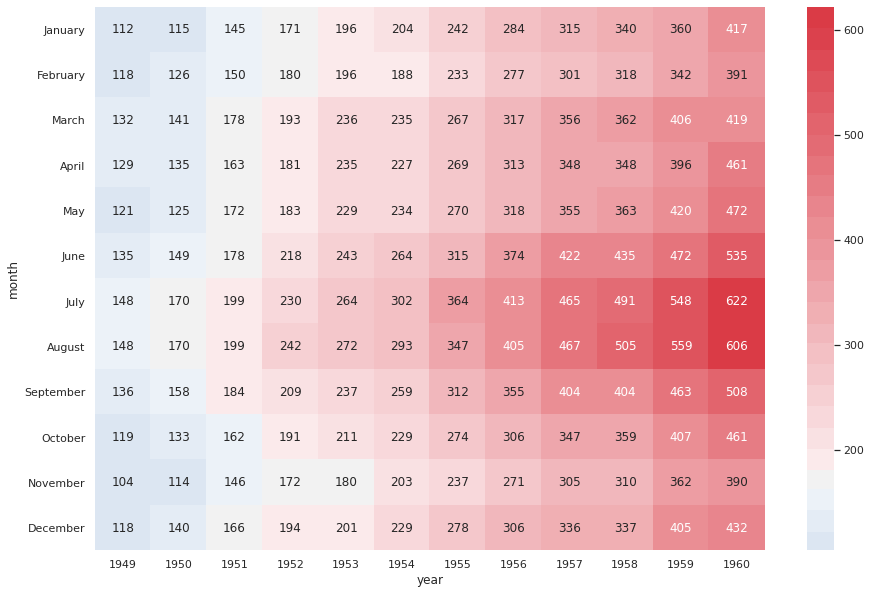

In [456]:
fig = plt.gcf()
fig.set_size_inches(15, 10);
sns.heatmap(fl_.T, annot = True, fmt = "d", 
            cmap = sns.diverging_palette(250, 10, n = 45),
            center = fl_.loc[1952, 'January']);